In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('/Users/etienneperez/Documents/IODAA/IA Solve/othello/resultats.csv', decimal = ',')

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
data = data.drop(0, axis = 0) # ligne descriptive des colonnes
data['commence'] = data.commence.astype('category')
data["prof"] = pd.to_numeric(data["prof"])
data["taux_victoire"] = data["taux_victoire"].astype(float)
# data["taux_victoire"] = pd.to_numeric(data["taux_victoire"])

# Test de MinMax/AlphaBêta contre le hasard
Dans cette partie, on s'intéresse à la performance des algorithmes contre le hasard.
Pour les algorithmes MinMax et AlphaBêta, on s'attend à avoir des performances comparables (à profondeur égale) étant donné que l'élagage alpha-bêta n'a pas d'impact sur la solution retournée par l'algorithme.
Pour chaque profondeur et algorithme, un certain nombre de simulations a été effectué et des intervalles de confiance à 95% calculés pour les taux de victoire. Le tableau de résultats est disponible en annexe.

In [3]:
data_1 = data[(data.prof < 5 ) &(((data.joueur1 == "min_max") & (data.joueur2 == "hasard")) | ((data.joueur1 == "alpha_beta") & (data.joueur2 == "hasard")) | ((data.joueur1 == "hasard") & (data.joueur2 == "min_max")) | ((data.joueur1 == "hasard") & (data.joueur2 == "alpha_beta")))]

Le graphique suivant présente les taux de victoire des algorithmes AlphaBeta et MinMax contre le hasard selon la profondeur d'exploration choisie.
La courbe MinMax vs Hasard correspond au cas où le joueur MinMax a joué en premier à chaque partie.

NameError: name 'plt' is not defined

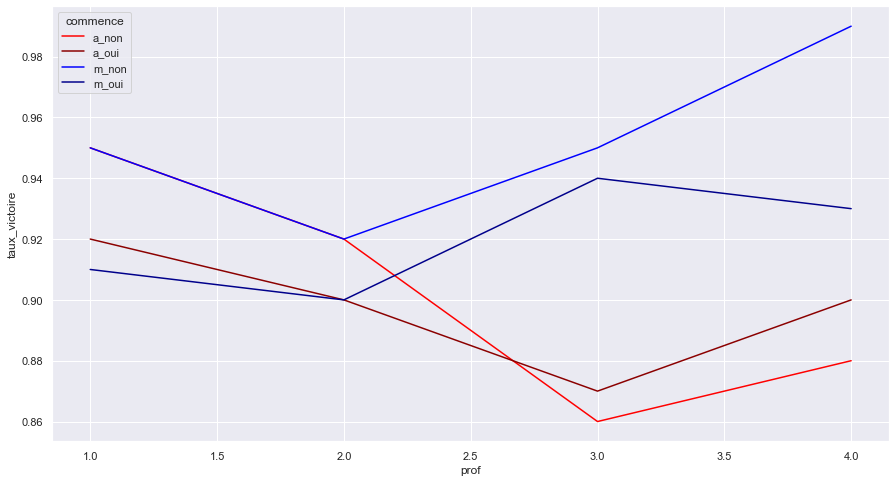

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(data = data_1, x = data_1.prof, y = data_1.taux_victoire, hue = data_1.commence, palette=["red", "darkred", "blue", "darkblue"])
plt.legend(title='', loc='lower right', labels=['Hasard vs AlphaBeta', 'AlphaBeta vs Hasard','Hasard vs MinMax','MinMax vs Hasard'])
plt.xlabel("Profondeur")
plt.ylabel("Taux de victoires")



Les algorithmes MinMAx et AlphaBeta présentent des performances supérieures à 85% contre le hasard.
Pour des profondeurs 1 et 2, les performances de MinMAx et AlphaBeta sont identiques mais à partir de la profondeur 3, MinMax semble plus performant que AlphaBeta.


Les graphiques suivants présentent les intervalles de confiance (en pointillés) des taux de victoire : 

Text(0, 0.5, 'Taux de victoires')

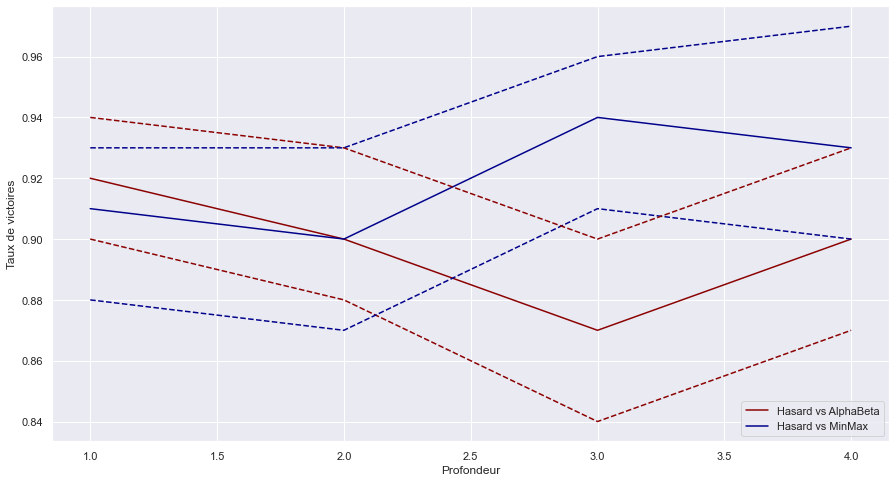

In [ ]:
data_1_1 = data_1[((data_1.joueur1 == "min_max") & (data_1.joueur2 == "hasard")) | ((data_1.joueur1 == "alpha_beta") & (data_1.joueur2 == "hasard"))]
sns.lineplot(data = data_1_1, x = data_1_1.prof, y = data_1_1.taux_victoire, hue = data_1_1.commence, legend = True, palette=["red", "darkred", "blue", "darkblue"])
sns.lineplot(data = data_1_1, x = data_1_1.prof, y = data_1_1.borne_inf_95, hue = data_1_1.commence, linestyle = "--", legend = False, palette=["red", "darkred", "blue", "darkblue"])
sns.lineplot(data = data_1_1, x = data_1_1.prof, y = data_1_1.borne_sup_95, hue = data_1_1.commence, linestyle = "--", legend = False, palette=["red", "darkred", "blue", "darkblue"])
plt.legend(title='', loc='lower right', labels=['Hasard vs AlphaBeta', 'Hasard vs MinMax'])
plt.xlabel("Profondeur")
plt.ylabel("Taux de victoires")

Text(0, 0.5, 'Taux de victoires')

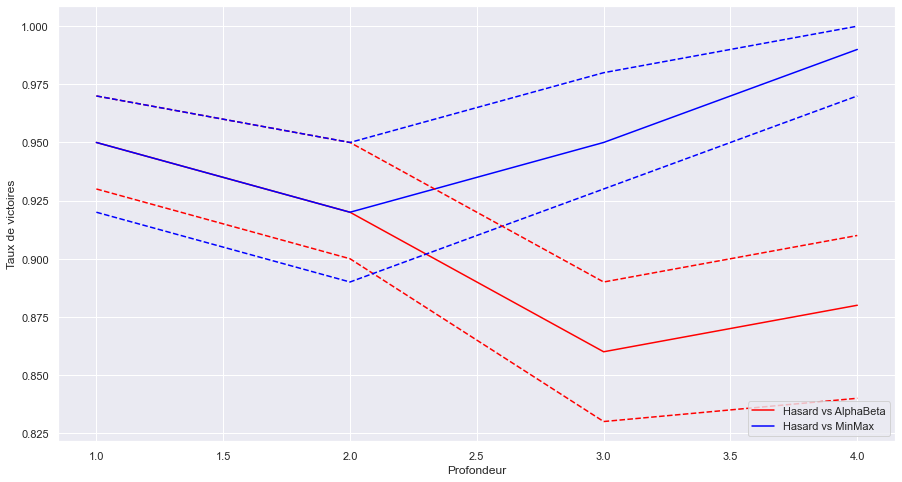

In [ ]:
data_1_2 = data_1[((data_1.joueur1 == "hasard") & (data_1.joueur2 == "min_max")) | ((data_1.joueur1 == "hasard") & (data_1.joueur2 == "alpha_beta"))]
sns.lineplot(data = data_1_2, x = data_1_2.prof, y = data_1_2.taux_victoire, hue = data_1_2.commence, legend = True, palette=["red", "darkred", "blue", "darkblue"])
sns.lineplot(data = data_1_2, x = data_1_2.prof, y = data_1_2.borne_inf_95, hue = data_1_2.commence, linestyle = "--", legend = False,palette=["red", "darkred", "blue", "darkblue"])
sns.lineplot(data = data_1_2, x = data_1_2.prof, y = data_1_2.borne_sup_95, hue = data_1_2.commence, linestyle = "--", legend = False,palette=["red", "darkred", "blue", "darkblue"])
plt.legend(title='', loc='lower right', labels=['Hasard vs AlphaBeta', 'Hasard vs MinMax'])
plt.xlabel("Profondeur")
plt.ylabel("Taux de victoires")

Les graphiques ci-dessus présentent des intervalles qui se recoupent pour les profondeurs 1 et 2 ce qui signifie que les performance de MinMax et AlphaBeta sont comparables pour ces profondeurs.
Cependant, à profondeur 3, et à profondeur 4 quand le Hasard commence à jouer, on observe que les performances des algorithmes MinMax et AlphaBêta sont significativement différentes (intervalles de confiance non recoupés).
Cela est surprenant étant donné que ces algorithmes sont supposés retourner la même solution. 

# Test de MCTS contre le Hasard
Ces premiers graphiques sont issus de simulations où le Hasard commence à jouer
Le graphique ci-dessous présente les performance de l'algorithme MCTS pour un nombre de simulations N = 10, T varie entre 5, 10 et 15 et C varie entre 1, 2, 3, 4, 5, 8 et 10.

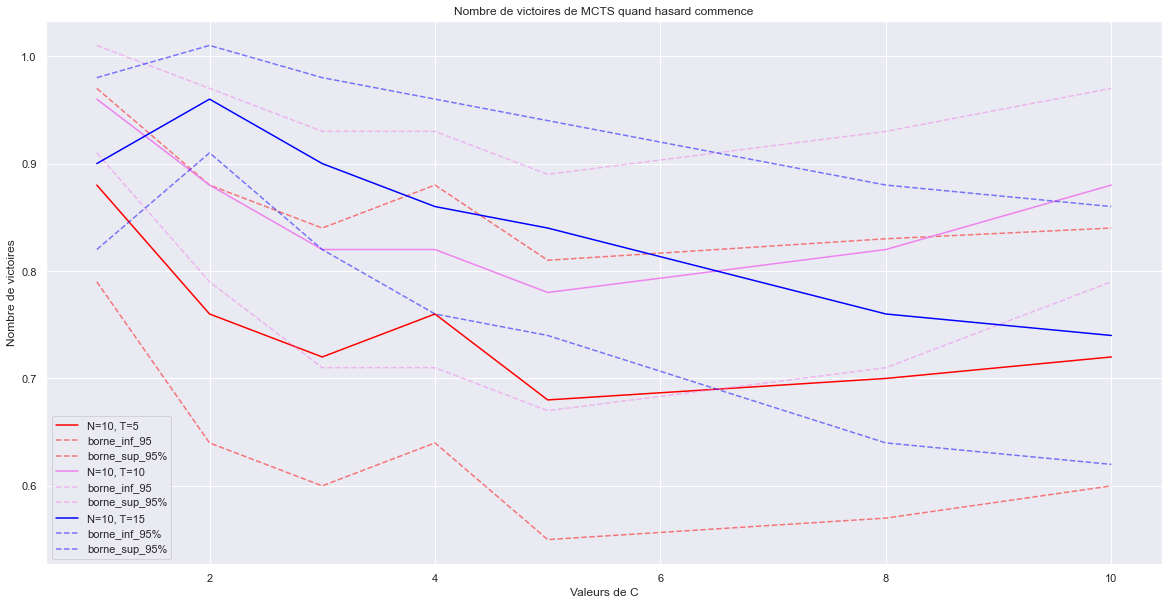

In [ ]:
results = pd.read_table("/Users/etienneperez/Documents/IODAA/IA Solve/othello/resultats_MCTS.csv", sep=",")

results_N10 = results.iloc[0:21,]
results_N10_T5 = results_N10.iloc[0:7,]
results_N10_T10 = results_N10.iloc[7:14,]
results_N10_T15 = results_N10.iloc[14:21,]


plt.figure(figsize=(20, 10))
plt.plot(results_N10_T5["C"], results_N10_T5["tx_gain"], color='red', label="N=10, T=5")
plt.plot(results_N10_T5["C"], results_N10_T5["borne_inf"], color='red', label="borne_inf_95", linestyle='--', alpha=0.5)
plt.plot(results_N10_T5["C"], results_N10_T5["borne_max"], color='red', label="borne_sup_95%", linestyle='--', alpha=0.5)

plt.plot(results_N10_T10["C"], results_N10_T10["tx_gain"], color='violet', label="N=10, T=10")
plt.plot(results_N10_T10["C"], results_N10_T10["borne_inf"], color='violet', label="borne_inf_95", linestyle='--', alpha=0.5)
plt.plot(results_N10_T10["C"], results_N10_T10["borne_max"], color='violet', label="borne_sup_95%", linestyle='--', alpha=0.5)


plt.plot(results_N10_T15["C"], results_N10_T15["tx_gain"], color='blue', label="N=10, T=15")
plt.plot(results_N10_T15["C"], results_N10_T15["borne_inf"], color='blue', label="borne_inf_95%", linestyle='--', alpha=0.5)
plt.plot(results_N10_T15["C"], results_N10_T15["borne_max"], color='blue', label="borne_sup_95%", linestyle='--', alpha=0.5)

plt.title("Nombre de victoires de MCTS quand hasard commence")
plt.xlabel("Valeurs de C")
plt.ylabel("Nombre de victoires")
plt.legend()

Dans l'ensemble, on observe une tendance à plus gagner quand T est plus élevé donc qu'il y plus de parties aléatoires jouées sur un même othellier d'expansion. Egalement, il semble que plus la valeur de C augmentee et moins l'algorithme est bon. Il est probable que cela soit du au fait qu'il explore plus lorsque C est plus élevé, ce qui revient à jouer moins de coups assurément gagnants.

Le graphique ci-dessous présente les performance de l'algorithme MCTS pour un nombre de simulations N = 15 :

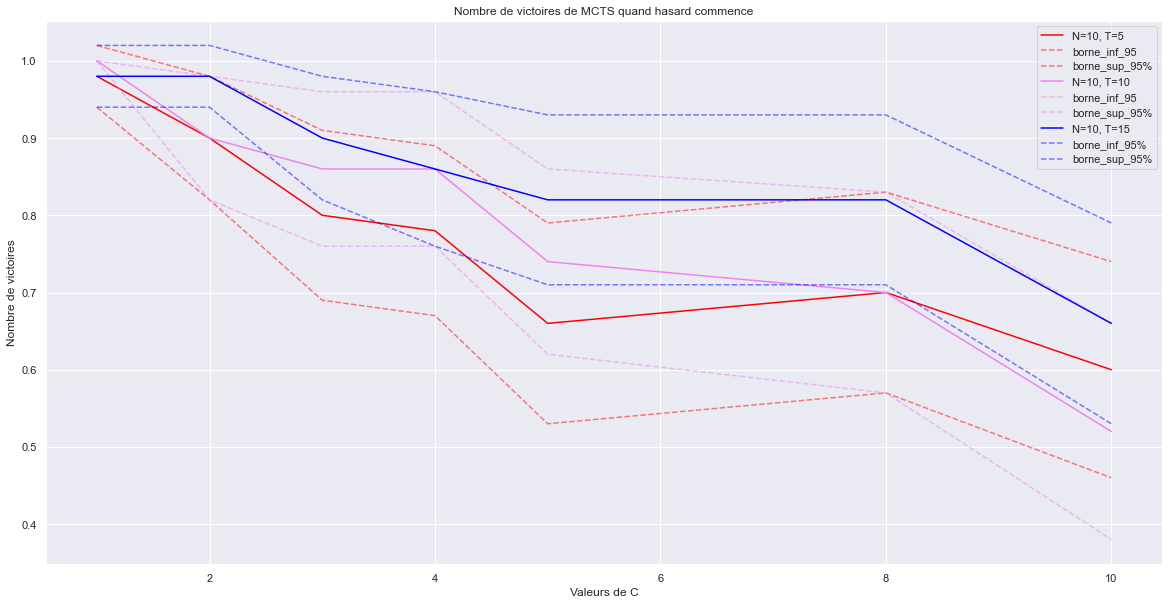

In [ ]:

results_N15 = results.iloc[21:21*2,]
results_N15_T5 = results_N15.iloc[0:7,]
results_N15_T10 = results_N15.iloc[7:14,]
results_N15_T15 = results_N15.iloc[14:21,]


plt.figure(figsize=(20, 10))
plt.plot(results_N15_T5["C"], results_N15_T5["tx_gain"], color='red', label="N=10, T=5")
plt.plot(results_N15_T5["C"], results_N15_T5["borne_inf"], color='red', label="borne_inf_95", linestyle='--', alpha=0.5)
plt.plot(results_N15_T5["C"], results_N15_T5["borne_max"], color='red', label="borne_sup_95%", linestyle='--', alpha=0.5)

plt.plot(results_N15_T10["C"], results_N15_T10["tx_gain"], color='violet', label="N=10, T=10")
plt.plot(results_N15_T10["C"], results_N15_T10["borne_inf"], color='violet', label="borne_inf_95", linestyle='--', alpha=0.5)
plt.plot(results_N15_T10["C"], results_N15_T10["borne_max"], color='violet', label="borne_sup_95%", linestyle='--', alpha=0.5)


plt.plot(results_N15_T15["C"], results_N15_T15["tx_gain"], color='blue', label="N=10, T=15")
plt.plot(results_N15_T15["C"], results_N15_T15["borne_inf"], color='blue', label="borne_inf_95%", linestyle='--', alpha=0.5)
plt.plot(results_N15_T15["C"], results_N15_T15["borne_max"], color='blue', label="borne_sup_95%", linestyle='--', alpha=0.5)

plt.title("Nombre de victoires de MCTS quand hasard commence")
plt.xlabel("Valeurs de C")
plt.ylabel("Nombre de victoires")
plt.legend()


Dans l'ensemble, on observe une tendance à plus gagner quand T est plus élevé donc qu'il y plus de parties aléatoires jouées sur un même othellier d'expansion. Egalement, il semble que plus la valeur de C augmentee et moins l'algorithme est bon. Il est probable que cela soit du au fait qu'il explore plus lorsque C est plus élevé, ce qui revient à jouer moins de coups assurément gagnants.

Le graphique ci-dessous présente les performance de l'algorithme MCTS pour un nombre de simulations N =  20 :

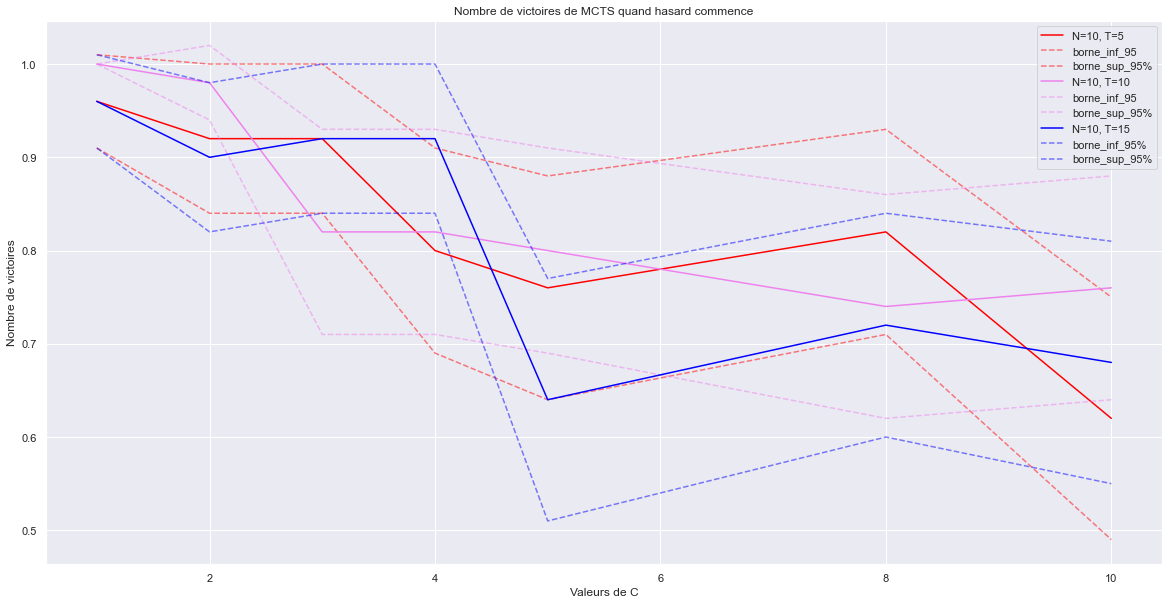

In [ ]:
results_N20 = results.iloc[21*2:21*3,]
results_N20_T5 = results_N20.iloc[0:7,]
results_N20_T10 = results_N20.iloc[7:14,]
results_N20_T15 = results_N20.iloc[14:21,]


plt.figure(figsize=(20, 10))
plt.plot(results_N20_T5["C"], results_N20_T5["tx_gain"], color='red', label="N=10, T=5")
plt.plot(results_N20_T5["C"], results_N20_T5["borne_inf"], color='red', label="borne_inf_95", linestyle='--', alpha=0.5)
plt.plot(results_N20_T5["C"], results_N20_T5["borne_max"], color='red', label="borne_sup_95%", linestyle='--', alpha=0.5)

plt.plot(results_N20_T10["C"], results_N20_T10["tx_gain"], color='violet', label="N=10, T=10")
plt.plot(results_N20_T10["C"], results_N20_T10["borne_inf"], color='violet', label="borne_inf_95", linestyle='--', alpha=0.5)
plt.plot(results_N20_T10["C"], results_N20_T10["borne_max"], color='violet', label="borne_sup_95%", linestyle='--', alpha=0.5)


plt.plot(results_N20_T15["C"], results_N20_T15["tx_gain"], color='blue', label="N=10, T=15")
plt.plot(results_N20_T15["C"], results_N20_T15["borne_inf"], color='blue', label="borne_inf_95%", linestyle='--', alpha=0.5)
plt.plot(results_N20_T15["C"], results_N20_T15["borne_max"], color='blue', label="borne_sup_95%", linestyle='--', alpha=0.5)

plt.title("Nombre de victoires de MCTS quand hasard commence")
plt.xlabel("Valeurs de C")
plt.ylabel("Nombre de victoires")
plt.legend()

Dans l'ensemble, on observe une tendance à plus gagner quand T est plus élevé donc qu'il y plus de parties aléatoires jouées sur un même othellier d'expansion. Egalement, il semble que plus la valeur de C augmentee et moins l'algorithme est bon. Il est probable que cela soit du au fait qu'il explore plus lorsque C est plus élevé, ce qui revient à jouer moins de coups assurément gagnants.

Les graphiques suivants correspondent aux simulations où MCTS commence à jouer.
Le graphique ci-dessous présente les performance de l'algorithme MCTS pour un nombre de simulations N =  10 :

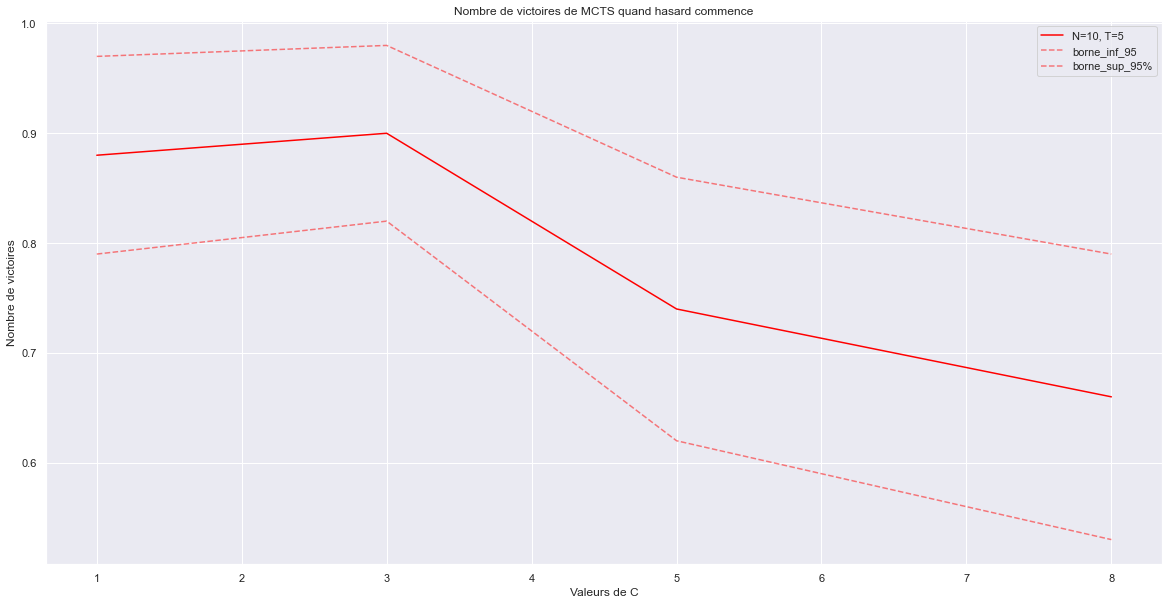

In [ ]:
results = pd.read_table("/Users/etienneperez/Documents/IODAA/IA Solve/othello/MCTSvsHasard.csv", sep=",")

results_N10 = results.iloc[0:4,]

plt.figure(figsize=(20, 10))
plt.plot(results_N10["C"], results_N10["tx_gain"], color='red', label="N=10, T=5")
plt.plot(results_N10["C"], results_N10["borne_inf"], color='red', label="borne_inf_95", linestyle='--', alpha=0.5)
plt.plot(results_N10["C"], results_N10["borne_max"], color='red', label="borne_sup_95%", linestyle='--', alpha=0.5)

plt.title("Nombre de victoires de MCTS quand hasard commence")
plt.xlabel("Valeurs de C")
plt.ylabel("Nombre de victoires")
plt.legend()


Les remarques sont les mêmes que lorsque Hasard commence à jouer, il ne semble pas que MCTS ait un avantage à jouer en premier ou un désavantage à jouer en deuxième.

Le graphique ci-dessous présente les performance de l'algorithme MCTS pour un nombre de simulations N =  15 :

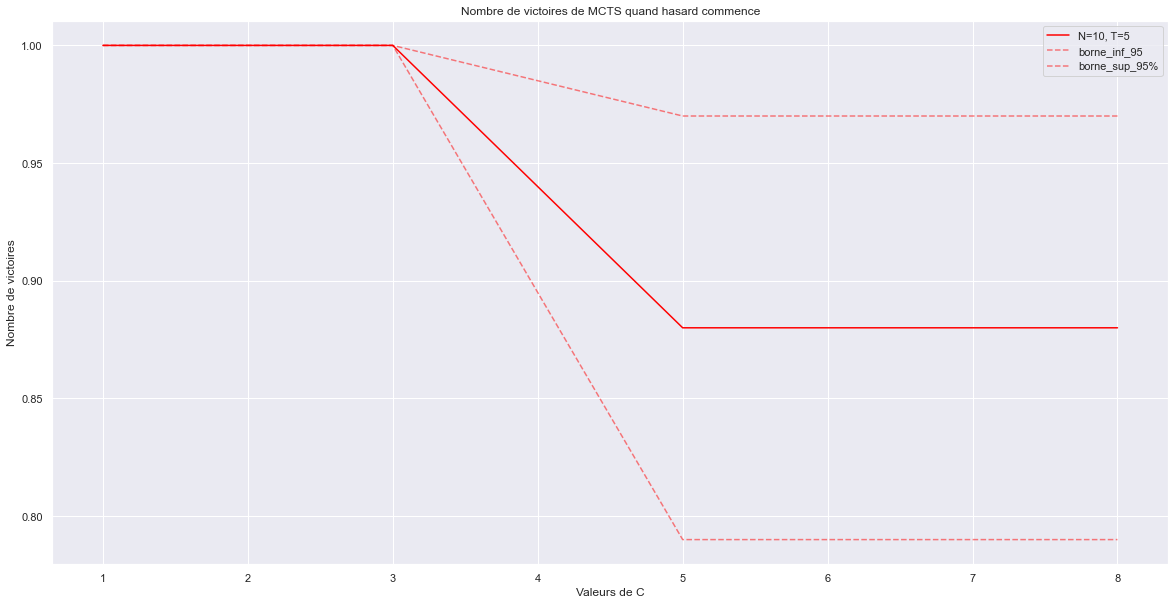

In [ ]:
results_N15 = results.iloc[4:8,]
plt.figure(figsize=(20, 10))
plt.plot(results_N15["C"], results_N15["tx_gain"], color='red', label="N=10, T=5")
plt.plot(results_N15["C"], results_N15["borne_inf"], color='red', label="borne_inf_95", linestyle='--', alpha=0.5)
plt.plot(results_N15["C"], results_N15["borne_max"], color='red', label="borne_sup_95%", linestyle='--', alpha=0.5)

plt.title("Nombre de victoires de MCTS quand hasard commence")
plt.xlabel("Valeurs de C")
plt.ylabel("Nombre de victoires")
plt.legend()